In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data
train_full = pd.read_csv('train.csv')
dev_full = pd.read_csv('valid.csv')
test_full = pd.read_csv('test.csv')

train_embed = np.load('train-embeddings.npy')
dev_embed = np.load('valid-embeddings.npy')
test_embed = np.load('test-embeddings.npy')
print(dev_embed.shape)
train_tfidf = np.load('train-tfidf.npy')
dev_tfidf = np.load('valid-tfidf.npy')
test_tfidf = np.load('test-tfidf.npy')
print(dev_tfidf.shape)

vocab = pd.read_csv('tfidf_words.csv')

(1737, 384)
(1737, 500)


In [3]:
# divide labelled and unlebelled data
train_full_labelled = train_full.iloc[:8000,:]
train_embed_labelled = train_embed[:8000]
train_tfidf_labelled = train_tfidf[:8000]

train_full_unlabelled = train_full.iloc[8000:,:]
train_embed_unlabelled = train_embed[8000:]
train_tfidf_unlabelled = train_tfidf[8000:]

# labelled data
train_label = train_full_labelled.salary_bin  
dev_label = dev_full.salary_bin
train_target = train_full_labelled.mean_salary
dev_target = dev_full.mean_salary

In [4]:
# convert categorical data to numereic data
factorized_train_data = train_full_labelled
factorized_train_full_data = train_full
factorized_dev_data = dev_full
for col in factorized_train_data.columns[:-1]:
    factorized_train_data[col], _ = pd.factorize(factorized_train_data[col], sort=True)
print(factorized_train_data.head())
for col in factorized_dev_data.columns[:-1]:
    factorized_dev_data[col], _ = pd.factorize(factorized_dev_data[col], sort=True)
print(factorized_dev_data.head())
for col in factorized_train_full_data.columns[:-1]:
    factorized_train_full_data[col], _ = pd.factorize(factorized_train_full_data[col], sort=True)
print(factorized_train_full_data.shape)

   job_id  requirements_and_role  salary_bin  mean_salary  gender_code
0    6318                   6805           9          436          2.0
1    5433                   3589           9          329          2.0
2    4882                   6199           4          148          2.0
3    5632                   5225           6          206          2.0
4     198                   2457           3          119          2.0
   job_id  requirements_and_role  salary_bin  mean_salary  gender_code
0       0                    811           8          185            2
1       1                   1362           8          174            2
2       2                   1604           2           53            0
3       3                    946           3           61            0
4       4                   1138           6          119            0
(13902, 5)


/var/folders/d6/0m_d_z0n6cn5c9yd2p797w4c0000gn/T/ipykernel_23588/4132888993.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factorized_train_data[col], _ = pd.factorize(factorized_train_data[col], sort=True)
/var/folders/d6/0m_d_z0n6cn5c9yd2p797w4c0000gn/T/ipykernel_23588/4132888993.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factorized_train_data[col], _ = pd.factorize(factorized_train_data[col], sort=True)


In [5]:
# feature engineering
# convert tfidf data to one hot line data
# 1 represent a word and 0 indicated no word exist by using ceil
train_word_labbeled = np.ceil(train_tfidf_labelled)
train_word_unlabbeled = np.ceil(train_tfidf_unlabelled)
dev_word = np.ceil(dev_tfidf)
test_word = np.ceil(test_tfidf)

# concat emmbedded and tfidf data
train_total_labelled = np.concatenate((train_embed_labelled, train_tfidf_labelled), axis=1)
train_total_unlabelled = np.concatenate((train_embed_unlabelled, train_tfidf_unlabelled), axis=1)
test_total = np.concatenate((test_tfidf, test_embed), axis=1)
dev_total = np.concatenate((dev_tfidf, dev_embed), axis=1)
dev_embed.shape

(1737, 384)

In [6]:
# This code calculates the interval for each band by subtracting the minimum value from the maximum value within each band.
## interval too small which lead to low acurracy.
lower_bounds = []
for i in range(len(train_label.value_counts())):
    min_val = train_full.loc[train_full['salary_bin'] == i, "mean_salary"].min()
    max_val = train_full.loc[train_full['salary_bin'] == i, "mean_salary"].max()
    lower_bounds.append(min_val)
    interval = max_val - min_val
    print(f"For band {i}, the min is {min_val}, the max is {max_val}, and the interval is {interval}")

For band 0, the min is 0, the max is 56, and the interval is 56
For band 1, the min is 57, the max is 75, and the interval is 18
For band 2, the min is 76, the max is 98, and the interval is 22
For band 3, the min is 99, the max is 119, and the interval is 20
For band 4, the min is 120, the max is 148, and the interval is 28
For band 5, the min is 149, the max is 175, and the interval is 26
For band 6, the min is 176, the max is 215, and the interval is 39
For band 7, the min is 216, the max is 245, and the interval is 29
For band 8, the min is 246, the max is 310, and the interval is 64
For band 9, the min is 311, the max is 455, and the interval is 144


In [63]:
import pandas as pd

lower_bounds = []
data = []

for i in range(len(train_label.value_counts())):
    min_val = train_full.loc[train_full['salary_bin'] == i, "mean_salary"].min()
    max_val = train_full.loc[train_full['salary_bin'] == i, "mean_salary"].max()
    lower_bounds.append(min_val)
    interval = max_val - min_val
    data.append([i, min_val, max_val, interval])

table = pd.DataFrame(data, columns=["Band", "Min Value", "Max Value", "Interval"])
table = table.set_index("Band")

print(table)


      Min Value  Max Value  Interval
Band                                
0             0         56        56
1            57         75        18
2            76         98        22
3            99        119        20
4           120        148        28
5           149        175        26
6           176        215        39
7           216        245        29
8           246        310        64
9           311        455       144


9.0    889
6.0    867
3.0    865
4.0    831
2.0    808
0.0    801
1.0    779
8.0    763
7.0    756
5.0    641
Name: salary_bin, dtype: int64

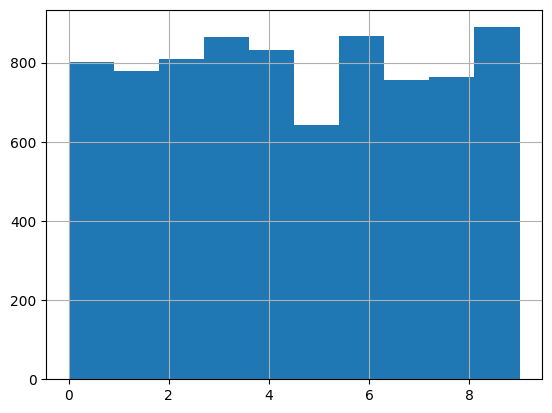

In [7]:
train_label.hist()
train_label.value_counts()
# band 5 has fewer data than the other bands, thus may caused a less accuracy prediction

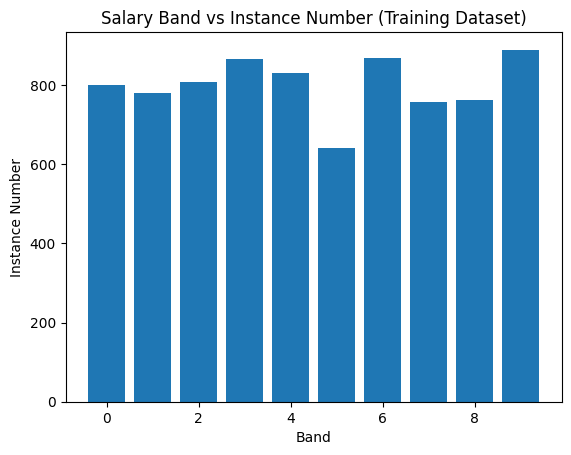

In [68]:
bands = [9.0, 6.0, 3.0, 4.0, 2.0, 0.0, 1.0, 8.0, 7.0, 5.0]
instance_numbers = [889, 867, 865, 831, 808, 801, 779, 763, 756, 641]

plt.bar(bands, instance_numbers)
plt.xlabel("Band")
plt.ylabel("Instance Number")
plt.title("Salary Band vs Instance Number (Training Dataset)")
plt.show()

4    201
3    190
2    181
0    180
6    178
9    173
8    171
7    171
5    150
1    142
Name: salary_bin, dtype: int64

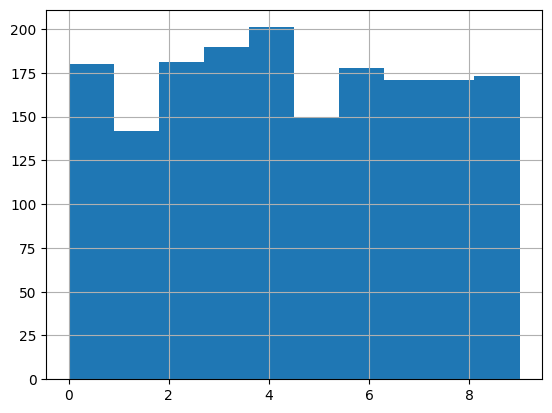

In [8]:
dev_label.hist()
dev_label.value_counts()
# band 5 still has relatively fewer data than the other bands, along with same limitation in tarining stage, 
# band 5 may has bad prediction and can be verified in later evaluation section.

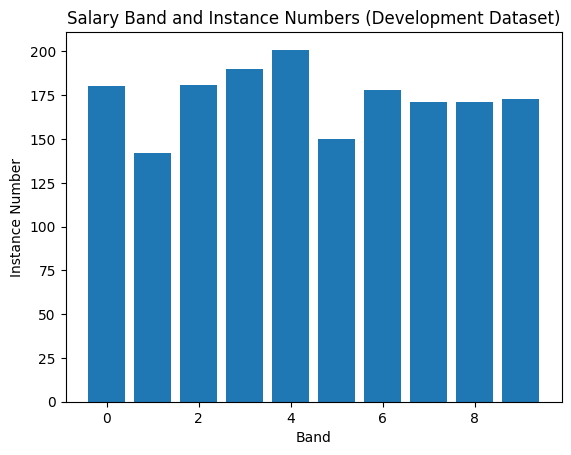

In [69]:
data = {
    4: 201,
    3: 190,
    2: 181,
    0: 180,
    6: 178,
    9: 173,
    8: 171,
    7: 171,
    5: 150,
    1: 142
}

bands = list(data.keys())
instances = list(data.values())

plt.bar(bands, instances)
plt.xlabel("Band")
plt.ylabel("Instance Number")
plt.title("Salary Band and Instance Numbers (Development Dataset)")
plt.show()


In [9]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Perceptron 
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import StackingClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.linear_model import LinearRegression 

models = [GaussianNB(), 
          DecisionTreeClassifier(max_depth=1), 
          KNeighborsClassifier(n_neighbors=1), 
          KNeighborsClassifier(n_neighbors=5), 
          DecisionTreeClassifier(max_depth=None), 
          LogisticRegression(solver="lbfgs", random_state=0,multi_class= "multinomial", max_iter = 140),
          Perceptron(tol=1e-3, random_state=0), 
          MLPClassifier([512,256,128,64],random_state=0, max_iter=100, early_stopping = True, learning_rate = 'adaptive'), 
          BaggingClassifier(base_estimator=LogisticRegression(solver="lbfgs", random_state=0,multi_class="multinomial"), n_estimators=5,max_samples = 0.3, random_state =0),
          AdaBoostClassifier(base_estimator =LogisticRegression(solver="lbfgs", random_state=0,multi_class="multinomial"), n_estimators=200, random_state=0)]
titles = ['GNB', 'one-r', '1-nearest neighbour', '5-nearest neighbour', 'Decision Tree', 'Logistic Regression', 'Perceptron', 'Neural Network', 'Bagging', 'Boosting'] 

acc_results = []
for title, model in zip(titles, models):
    model.fit(train_embed_labelled, train_label)
    acc_embed = model.score(dev_embed, dev_label)
    model.fit(train_tfidf_labelled, train_label)
    acc_tfidf = model.score(dev_tfidf,dev_label)
    model.fit(factorized_train_data, train_label)
    acc_raw = model.score(factorized_dev_data,dev_label)
    model.fit(train_word_labbeled, train_label)
    acc_word = model.score(dev_word, dev_label)
    model.fit(train_total_labelled, train_label)
    acc_total = model.score(dev_total, dev_label)
    
    acc_results.append([title, acc_embed, acc_tfidf, acc_raw, acc_word, acc_total])
    # print(f'{title} : accuracy of embedding is {acc_embed}, accuracy of tfidf is {acc_tfidf}, accuracy of raw is {acc_raw}')



/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [10]:
import csv
from tabulate import tabulate
headers_total = ['Model', 'Accuracy (Embedding)', 'Accuracy (TF-IDF)', 'Accuracy (Raw)','Accuracy (TF-IDF-OneHot)','Accuracy (TF-IDF and Embedding)']


with open('model_accuracies.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(headers_total)
    csv_writer.writerows(acc_results)
print("CSV file with model accuracies has been created.")

results_with_headers = [headers_total] + acc_results
print(tabulate(results_with_headers, headers="firstrow", tablefmt="grid"))


CSV file with model accuracies has been created.
+---------------------+------------------------+---------------------+------------------+----------------------------+-----------------------------------+
| Model               |   Accuracy (Embedding) |   Accuracy (TF-IDF) |   Accuracy (Raw) |   Accuracy (TF-IDF-OneHot) |   Accuracy (TF-IDF and Embedding) |
+=====================+========================+=====================+==================+============================+===================================+
| GNB                 |               0.229131 |            0.219919 |         1        |                   0.212435 |                         0.10593   |
+---------------------+------------------------+---------------------+------------------+----------------------------+-----------------------------------+
| one-r               |               0.166955 |            0.156592 |         0.202073 |                   0.156592 |                         0.103627  |
+--------------------

In [11]:
# test
# NB = GaussianNB()
# m31=KNeighborsClassifier(n_neighbors=1) 
# m61=LogisticRegression(solver="lbfgs", random_state=0,multi_class= "multinomial", max_iter = 140)
# m81=MLPClassifier([512,256,128,64],random_state=0, max_iter=100, early_stopping = True, learning_rate = 'adaptive')
# m91=BaggingClassifier(base_estimator=LogisticRegression(solver="lbfgs", random_state=0,multi_class="multinomial"), n_estimators=5,max_samples = 0.3, random_state =0)
# m100=AdaBoostClassifier(base_estimator =LogisticRegression(solver="lbfgs", random_state=0,multi_class="multinomial"), n_estimators=200, random_state=0)

# print(NB.fit(train_tfidf_labelled,train_label).score(dev_tfidf,dev_label))
# print(m100.fit(train_word_labbeled,train_label).score(dev_word,dev_label))

In [12]:
# dev data acc
dt_models = [ DecisionTreeClassifier(max_depth=1), 
             DecisionTreeClassifier(max_depth=5),
             DecisionTreeClassifier(max_depth=7),
             DecisionTreeClassifier(max_depth=10),
             DecisionTreeClassifier(max_depth=20),
             DecisionTreeClassifier(max_depth=35),
             ]
dt_titles = ['Depth 1', 'Depth 5', 'Depth 7', 'Depth 10', 'Depth 20','Depth 35'] 

dt_acc_results = []
for dt_title, baseline in zip(dt_titles, dt_models):
    dt_embed = baseline.fit(train_embed_labelled, train_label)
    dt_acc_embed = baseline.score(dev_embed, dev_label)
    dt_tfidf = baseline.fit(train_tfidf_labelled, train_label)
    dt_acc_tfidf = baseline.score(dev_tfidf,dev_label)
    dt_raw = baseline.fit(factorized_train_data, train_label)
    dt_acc_raw = baseline.score(factorized_dev_data,dev_label)
    dt_word = baseline.fit(train_word_labbeled, train_label)
    dt_acc_word = baseline.score(dev_word, dev_label)
    dt_total = baseline.fit(train_total_labelled, train_label)
    dt_acc_total = baseline.score(dev_total, dev_label)
    
    dt_acc_results.append([dt_title,dt_acc_embed,dt_acc_tfidf,dt_acc_raw,dt_acc_word,dt_acc_total])
    
headers_dt = ['Different depth of DT', 'Accuracy (Embedding)', 'Accuracy (TF-IDF)', 'Accuracy (Raw)','Accuracy (TF-IDF-OneHot)','Accuracy (TF-IDF and Embedding)']

dt_results_with_headers = [headers_dt] + dt_acc_results
print(tabulate(dt_results_with_headers, headers="firstrow", tablefmt="grid"))




+-------------------------+------------------------+---------------------+------------------+----------------------------+-----------------------------------+
| Different depth of DT   |   Accuracy (Embedding) |   Accuracy (TF-IDF) |   Accuracy (Raw) |   Accuracy (TF-IDF-OneHot) |   Accuracy (TF-IDF and Embedding) |
+=========================+========================+=====================+==================+============================+===================================+
| Depth 1                 |               0.166955 |            0.156592 |         0.102476 |                   0.156592 |                          0.103627 |
+-------------------------+------------------------+---------------------+------------------+----------------------------+-----------------------------------+
| Depth 5                 |               0.170409 |            0.176742 |         0.712723 |                   0.175014 |                          0.108233 |
+-------------------------+-------------------

In [13]:
# train data acc
dt_acc_train_results = []
for dt_title, baseline in zip(dt_titles, dt_models):
    dt_embed = baseline.fit(train_embed_labelled, train_label)
    dt_acc_embed = baseline.score(train_embed_labelled, train_label)
    dt_tfidf = baseline.fit(train_tfidf_labelled, train_label)
    dt_acc_tfidf = baseline.score(train_tfidf_labelled,train_label)
    dt_raw = baseline.fit(factorized_train_data, train_label)
    dt_acc_raw = baseline.score(factorized_train_data,train_label)
    dt_word = baseline.fit(train_word_labbeled, train_label)
    dt_acc_word = baseline.score(train_word_labbeled, train_label)
    dt_total = baseline.fit(train_total_labelled, train_label)
    dt_acc_total = baseline.score(train_total_labelled, train_label)
    
    dt_acc_train_results.append([dt_title,dt_acc_embed,dt_acc_tfidf,dt_acc_raw,dt_acc_word,dt_acc_total])
    
headers_dt = ['Different depth of DT', 'Accuracy (Embedding)', 'Accuracy (TF-IDF)', 'Accuracy (Raw)','Accuracy (TF-IDF-OneHot)','Accuracy (TF-IDF and Embedding)']

dt_results_with_headers_train = [headers_dt] + dt_acc_train_results
print(tabulate(dt_results_with_headers_train, headers="firstrow", tablefmt="grid"))



+-------------------------+------------------------+---------------------+------------------+----------------------------+-----------------------------------+
| Different depth of DT   |   Accuracy (Embedding) |   Accuracy (TF-IDF) |   Accuracy (Raw) |   Accuracy (TF-IDF-OneHot) |   Accuracy (TF-IDF and Embedding) |
+=========================+========================+=====================+==================+============================+===================================+
| Depth 1                 |               0.164625 |            0.15875  |         0.2195   |                    0.15875 |                          0.164625 |
+-------------------------+------------------------+---------------------+------------------+----------------------------+-----------------------------------+
| Depth 5                 |               0.2185   |            0.200125 |         0.825375 |                    0.20425 |                          0.21725  |
+-------------------------+-------------------

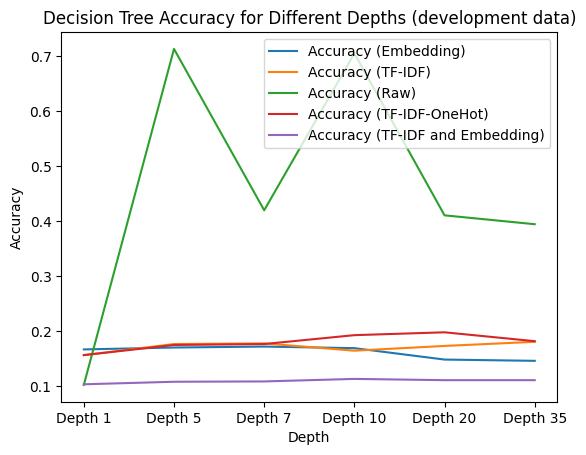

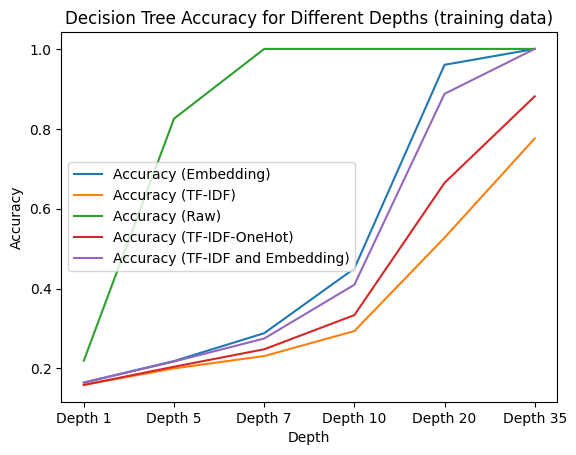

In [14]:
# Prepare dev data for plotting
depths = [result[0] for result in dt_acc_results]
values = [[result[i] for result in dt_acc_results] for i in range(1, 6)]

# Plot data
accuracy_labels = ['Accuracy (Embedding)', 'Accuracy (TF-IDF)', 'Accuracy (Raw)', 'Accuracy (TF-IDF-OneHot)', 'Accuracy (TF-IDF and Embedding)']
for i, value in enumerate(values):
    plt.plot(depths, value, label=accuracy_labels[i])

plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Decision Tree Accuracy for Different Depths (development data)')
plt.show()

# Prepare train data for plotting
train_values = [[result[i] for result in dt_acc_train_results] for i in range(1, 6)]

# Plot data
for i, value in enumerate(train_values):
    plt.plot(depths, value, label=accuracy_labels[i])

plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Decision Tree Accuracy for Different Depths (training data)')
plt.show()

In [15]:
# test_clf = BaggingClassifier(MLPClassifier([512,256,128,64],random_state=0, max_iter=100, early_stopping = True, learning_rate = 'adaptive'))
# test_clf.fit(train_embed_labelled,train_label).score(dev_embed,dev_label)

In [16]:

solvers = ['lbfgs', 'liblinear', 'newton-cg']
penalty = ['l2']
c_values = [10, 1.0, 0.1]

headers_lr = ['Hyperparameter tuning', 'Accuracy (Embedding)', 'Accuracy (Raw)','Accuracy (TF-IDF)']
results_lr = []

# dev lr data
for solver in solvers:
    for c in c_values:
        model = LogisticRegression(solver=solver, penalty=penalty[0], C=c)
        model.fit(train_embed_labelled, train_label)
        acc_embed = model.score(dev_embed, dev_label)
        model.fit(factorized_train_data, train_label)
        acc_raw = model.score(factorized_dev_data,dev_label)
        model.fit(train_tfidf_labelled, train_label)
        acc_tfidf = model.score(dev_tfidf, dev_label)

        results_lr.append([f'Solver: {solver}, C: {c}', acc_embed, acc_raw, acc_tfidf])

print(tabulate(results_lr, headers=headers_lr, tablefmt='grid'))

# train lr data
results_lr_train= []
for solver in solvers:
    for c in c_values:
        model = LogisticRegression(solver=solver, penalty=penalty[0], C=c)
        model.fit(train_embed_labelled, train_label)
        acc_embed_train = model.score(train_embed_labelled, train_label)
        model.fit(factorized_train_data, train_label)
        acc_raw_train= model.score(factorized_train_data, train_label)
        model.fit(train_tfidf_labelled, train_label)
        acc_tfidf_train = model.score(train_tfidf_labelled, train_label)

        results_lr_train.append([f'Solver: {solver}, C: {c}', acc_embed_train, acc_raw_train, acc_tfidf_train])

print(tabulate(results_lr_train, headers=headers_lr, tablefmt='grid'))

/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

+---------------------------+------------------------+------------------+---------------------+
| Hyperparameter tuning     |   Accuracy (Embedding) |   Accuracy (Raw) |   Accuracy (TF-IDF) |
+===========================+========================+==================+=====================+
| Solver: lbfgs, C: 10      |               0.230858 |         0.112263 |            0.208405 |
+---------------------------+------------------------+------------------+---------------------+
| Solver: lbfgs, C: 1.0     |               0.242372 |         0.112838 |            0.218192 |
+---------------------------+------------------------+------------------+---------------------+
| Solver: lbfgs, C: 0.1     |               0.237766 |         0.112263 |            0.227979 |
+---------------------------+------------------------+------------------+---------------------+
| Solver: liblinear, C: 10  |               0.233736 |         0.248129 |            0.204951 |
+---------------------------+-----------

/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

+---------------------------+------------------------+------------------+---------------------+
| Hyperparameter tuning     |   Accuracy (Embedding) |   Accuracy (Raw) |   Accuracy (TF-IDF) |
+===========================+========================+==================+=====================+
| Solver: lbfgs, C: 10      |               0.365375 |         0.30575  |            0.408125 |
+---------------------------+------------------------+------------------+---------------------+
| Solver: lbfgs, C: 1.0     |               0.3295   |         0.30325  |            0.380125 |
+---------------------------+------------------------+------------------+---------------------+
| Solver: lbfgs, C: 0.1     |               0.277625 |         0.3055   |            0.30675  |
+---------------------------+------------------------+------------------+---------------------+
| Solver: liblinear, C: 10  |               0.37075  |         0.6525   |            0.402125 |
+---------------------------+-----------

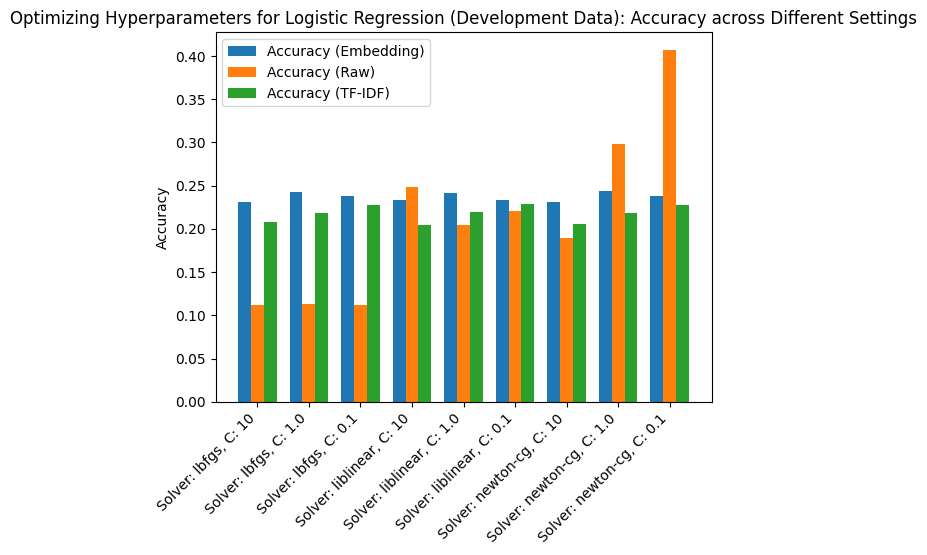

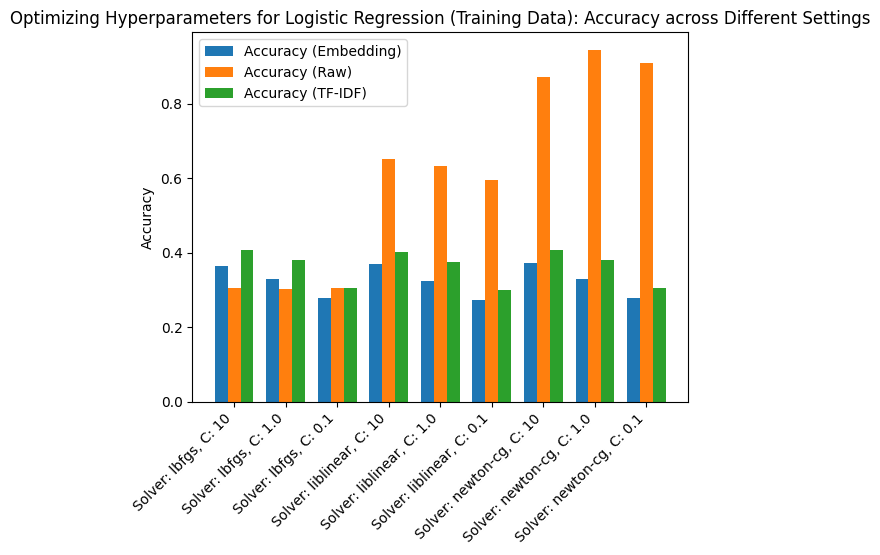

In [17]:
# Function to plot data
def plot_data(solver_c_combinations, embedding_acc, raw_acc, tfidf_acc, title):
    x = np.arange(len(solver_c_combinations))
    bar_width = 0.25

    fig, ax = plt.subplots()
    bar1 = ax.bar(x - bar_width, embedding_acc, bar_width, label='Accuracy (Embedding)')
    bar2 = ax.bar(x, raw_acc, bar_width, label='Accuracy (Raw)')
    bar3 = ax.bar(x + bar_width, tfidf_acc, bar_width, label='Accuracy (TF-IDF)')

    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(solver_c_combinations, rotation=45, ha='right')
    ax.legend()

    plt.show()

# Data 1: development data
solver_c_combinations = [result[0] for result in results_lr]
embedding_acc = [result[1] for result in results_lr]
raw_acc = [result[2] for result in results_lr]
tfidf_acc = [result[3] for result in results_lr]

# Plot development data
plot_data(solver_c_combinations, embedding_acc, raw_acc, tfidf_acc,
          'Optimizing Hyperparameters for Logistic Regression (Development Data): Accuracy across Different Settings')

# Data 2: training data
solver_c_combinations_t = [result[0] for result in results_lr_train]
embedding_acc_t = [result[1] for result in results_lr_train]
raw_acc_t = [result[2] for result in results_lr_train]
tfidf_acc_t = [result[3] for result in results_lr_train]

# Plot training data
plot_data(solver_c_combinations_t, embedding_acc_t, raw_acc_t, tfidf_acc_t,
          'Optimizing Hyperparameters for Logistic Regression (Training Data): Accuracy across Different Settings')

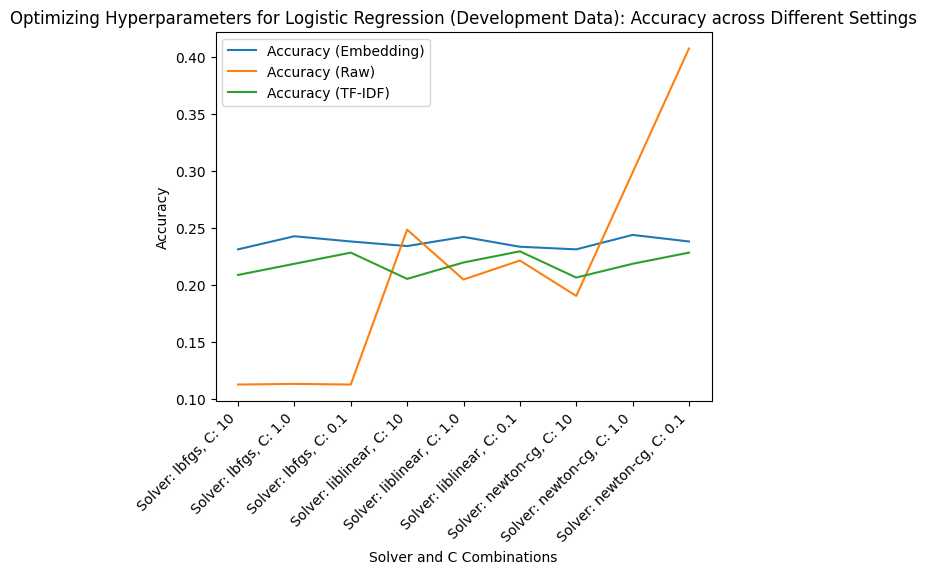

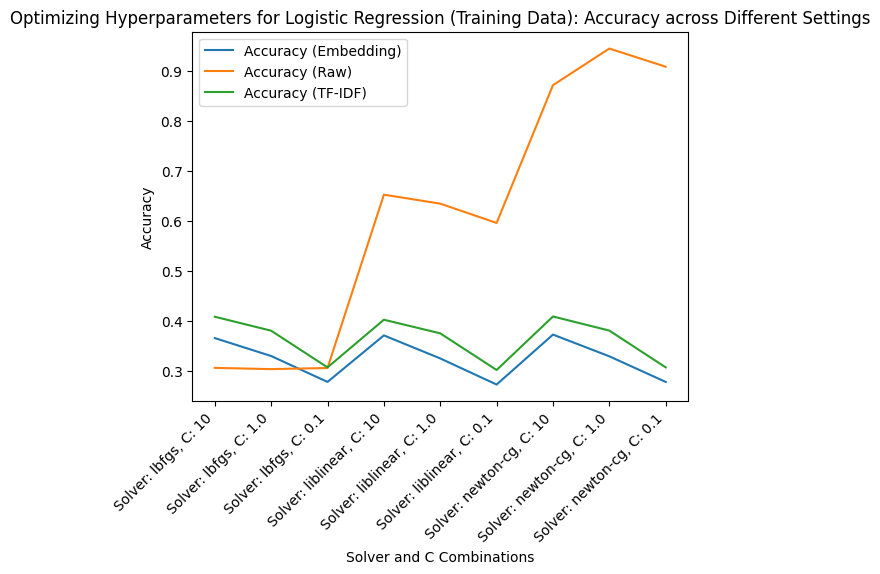

In [70]:
# Function to plot data as line graphs
def plot_data(solver_c_combinations, embedding_acc, raw_acc, tfidf_acc, title):
    x = np.arange(len(solver_c_combinations))

    fig, ax = plt.subplots()
    ax.plot(x, embedding_acc, label='Accuracy (Embedding)')
    ax.plot(x, raw_acc, label='Accuracy (Raw)')
    ax.plot(x, tfidf_acc, label='Accuracy (TF-IDF)')

    ax.set_xlabel('Solver and C Combinations')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(solver_c_combinations, rotation=45, ha='right')
    ax.legend()

    plt.show()

# Data 1: development data
solver_c_combinations = [result[0] for result in results_lr]
embedding_acc = [result[1] for result in results_lr]
raw_acc = [result[2] for result in results_lr]
tfidf_acc = [result[3] for result in results_lr]

# Plot development data
plot_data(solver_c_combinations, embedding_acc, raw_acc, tfidf_acc,
          'Optimizing Hyperparameters for Logistic Regression (Development Data): Accuracy across Different Settings')

# Data 2: training data
solver_c_combinations_t = [result[0] for result in results_lr_train]
embedding_acc_t = [result[1] for result in results_lr_train]
raw_acc_t = [result[2] for result in results_lr_train]
tfidf_acc_t = [result[3] for result in results_lr_train]

# Plot training data
plot_data(solver_c_combinations_t, embedding_acc_t, raw_acc_t, tfidf_acc_t,
          'Optimizing Hyperparameters for Logistic Regression (Training Data): Accuracy across Different Settings')


/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

+-----------------------------------------------------------------+------------------------+
| Model Combination                                               |   Accuracy (Embedding) |
+=================================================================+========================+
| GNB+1-nearest neighbour+Logistic Regression+Neural Network      |               0.26137  |
+-----------------------------------------------------------------+------------------------+
| GNB+1-nearest neighbour+Logistic Regression+Bagging             |               0.252735 |
+-----------------------------------------------------------------+------------------------+
| GNB+1-nearest neighbour+Logistic Regression+Boosting            |               0.252735 |
+-----------------------------------------------------------------+------------------------+
| GNB+1-nearest neighbour+Neural Network+Bagging                  |               0.258492 |
+-----------------------------------------------------------------+---

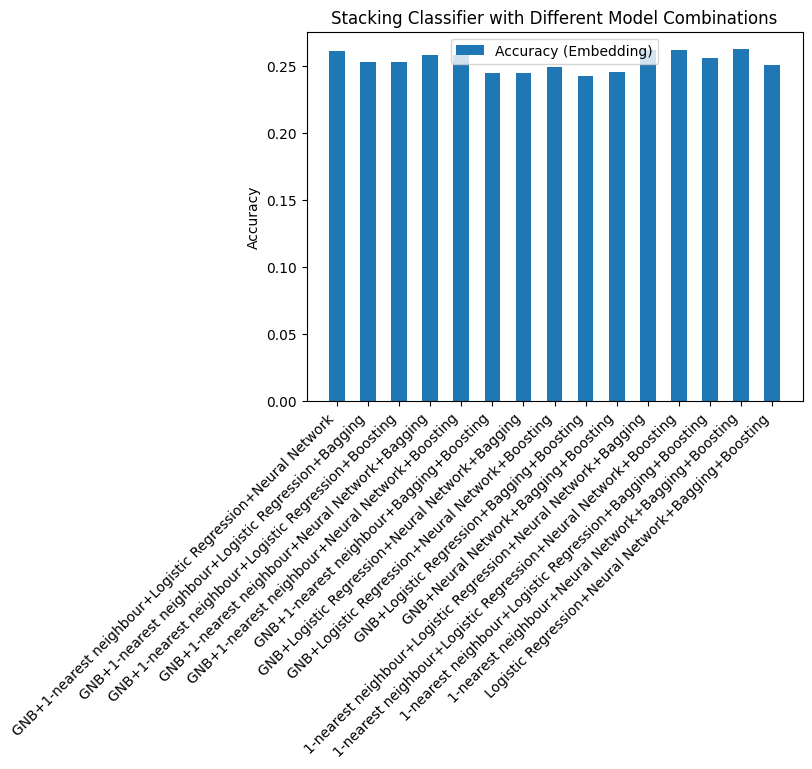

In [71]:
from itertools import combinations
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

models = [GaussianNB(), 
           
          KNeighborsClassifier(n_neighbors=1), 
          

          LogisticRegression(solver="lbfgs", random_state=0,multi_class= "multinomial", max_iter = 140),
         
          MLPClassifier([512,256,128,64],random_state=0, max_iter=100, early_stopping = True, learning_rate = 'adaptive'), 
          BaggingClassifier(estimator=LogisticRegression(solver="lbfgs", random_state=0,multi_class="multinomial"), n_estimators=5,max_samples = 0.3, random_state =0),
          AdaBoostClassifier(estimator =LogisticRegression(solver="lbfgs", random_state=0,multi_class="multinomial"), n_estimators=200, random_state=0)]
titles = ['GNB', '1-nearest neighbour', 'Logistic Regression', 'Neural Network', 'Bagging', 'Boosting'] 


headers = ['Model Combination', 'Accuracy (Embedding)' ]
stacking_results = []


# Loop through all combinations of models
for model_subset in combinations(zip(titles, models), 4):
    model_names = [title for title, _ in model_subset]
    base_models = [model for _, model in model_subset]

    stacking_clf = StackingClassifier(estimators=[(str(i), m) for i, m in enumerate(base_models)], final_estimator=LogisticRegression())

    stacking_clf.fit(train_embed_labelled, train_label)
    acc_embed = stacking_clf.score(dev_embed, dev_label)

    stacking_results.append(['+'.join(model_names), acc_embed])

# Display results as a table
print(tabulate(stacking_results, headers=headers, tablefmt='grid'))

# Plot the data
model_combinations = [result[0] for result in stacking_results]
accuracy_values = [result[1] for result in stacking_results]

x = np.arange(len(model_combinations))
bar_width = 0.5

fig, ax = plt.subplots()
bar1 = ax.bar(x, accuracy_values, bar_width, label='Accuracy (Embedding)')

ax.set_ylabel('Accuracy')
ax.set_title('Stacking Classifier with Different Model Combinations')
ax.set_xticks(x)
ax.set_xticklabels(model_combinations, rotation=45, ha='right')
ax.legend()

plt.show()

In [72]:
# Sort the stacking_results by accuracy in descending order
sorted_stacking_results = sorted(stacking_results, key=lambda x: x[1], reverse=True)

# Get the top 5 results
top_5_results = sorted_stacking_results[:5]

# Display top 5 results as a table
print("Top 5 Accuracies:")
print(tabulate(top_5_results, headers=headers, tablefmt='grid'))


Top 5 Accuracies:
+-----------------------------------------------------------------+------------------------+
| Model Combination                                               |   Accuracy (Embedding) |
+=================================================================+========================+
| 1-nearest neighbour+Neural Network+Bagging+Boosting             |               0.262522 |
+-----------------------------------------------------------------+------------------------+
| 1-nearest neighbour+Logistic Regression+Neural Network+Bagging  |               0.261946 |
+-----------------------------------------------------------------+------------------------+
| 1-nearest neighbour+Logistic Regression+Neural Network+Boosting |               0.261946 |
+-----------------------------------------------------------------+------------------------+
| GNB+1-nearest neighbour+Logistic Regression+Neural Network      |               0.26137  |
+---------------------------------------------------

In [24]:
# final ensemble
final = LogisticRegression(solver="lbfgs", random_state=1,multi_class="multinomial", max_iter = 140)

m1=GaussianNB()
m3=KNeighborsClassifier(n_neighbors=1) 
m6=LogisticRegression(solver="lbfgs", random_state=0,multi_class= "multinomial", max_iter = 140)
m8=MLPClassifier([512,256,128,64],random_state=0, max_iter=100, early_stopping = True, learning_rate = 'adaptive')
#m9=BaggingClassifier(base_estimator=LogisticRegression(solver="lbfgs", random_state=0,multi_class="multinomial"), n_estimators=5,max_samples = 0.3, random_state =0)
m10=AdaBoostClassifier(base_estimator =LogisticRegression(solver="lbfgs", random_state=0,multi_class="multinomial"), n_estimators=200, random_state=0)

estimators = [("m1",m1),('m3',m3),('m6',m6),('m8',m8),('m10',m10)]

clf = StackingClassifier(estimators=estimators, final_estimator=final)
clf.fit(train_embed_labelled,train_label).score(dev_embed,dev_label)

/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 

0.26137017846862404

In [36]:
final_1 = LogisticRegression(solver="lbfgs", random_state=1,multi_class="multinomial", max_iter = 140)

# m1=GaussianNB()
m3=KNeighborsClassifier(n_neighbors=1) 
m6=LogisticRegression(solver="lbfgs", random_state=0,multi_class= "multinomial", max_iter = 140)
m8=MLPClassifier([512,256,128,64],random_state=0, max_iter=100, early_stopping = True, learning_rate = 'adaptive')
#m9=BaggingClassifier(base_estimator=LogisticRegression(solver="lbfgs", random_state=0,multi_class="multinomial"), n_estimators=5,max_samples = 0.3, random_state =0)
#m10=AdaBoostClassifier(base_estimator =LogisticRegression(solver="lbfgs", random_state=0,multi_class="multinomial"), n_estimators=200, random_state=0)

estimators = [('m3',m3),('m6',m6),('m8',m8)]

clf_1 = StackingClassifier(estimators=estimators, final_estimator=final)
clf_1.fit(train_embed_labelled,train_label).score(dev_embed,dev_label)

0.26194588370754174

In [38]:
# clf1 and clf2 have higher accuracy than clf in development, but clf have higher accuracy in final test
m9=BaggingClassifier(base_estimator=LogisticRegression(solver="lbfgs", random_state=0,multi_class="multinomial"), n_estimators=5,max_samples = 0.3, random_state =0)
estimators = [('m3',m3),('m8',m8),('m9',m9)]
clf_2 = StackingClassifier(estimators=estimators, final_estimator=final)
clf_2.fit(train_embed_labelled,train_label).score(dev_embed,dev_label)

/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 

0.26252158894645944

In [30]:
train_fill_label = pd.Series([-1]*5902)
semi_label = pd.concat([train_label, train_fill_label]).reset_index(drop=True)


In [25]:
from sklearn.semi_supervised import SelfTrainingClassifier

#dt
dt_model = DecisionTreeClassifier(max_depth=6)
#lr
lr_model = LogisticRegression(solver='lbfgs')
#enseble
clf = StackingClassifier(estimators=estimators, final_estimator=final)

#semi
train_fill_label = pd.Series([-1]*5902)
semi_label = pd.concat([train_label, train_fill_label]).reset_index(drop=True)



headers = ['Model', 'Self-Training (Embedding)', 'Base Model (Embedding)', 'Self-Training (TF-IDF)', 
           'Base Model (TF-IDF)']

results = []
selected_models= [dt_model, lr_model,clf]

for model in selected_models:
    self_trainning_model = SelfTrainingClassifier(model, threshold=0.75)
    
    # Self-training and base model for Embedding dataset
    self_trainning_model.fit(train_embed, semi_label)
    self_trained_embed = self_trainning_model.score(dev_embed, dev_label)
    model.fit(train_embed_labelled, train_label)
    base_model_embed = model.score(dev_embed, dev_label)
    
    # Self-training and base model for TF-IDF dataset
    # self_trainning_model.fit(train_tfidf, semi_label)
    # self_trained_tfidf = self_trainning_model.score(dev_tfidf, dev_label)
    # model.fit(train_tfidf_labelled, train_label)
    # base_model_tfidf = model.score(dev_tfidf, dev_label)
    
    # # Self-training and base model for Raw dataset
    # self_trainning_model.fit(factorized_train_full_data, semi_label)
    # self_trained_raw = self_trainning_model.score(factorized_dev_data, dev_label)
    # model.fit(factorized_train_data, train_label)
    # base_model_raw = model.score(factorized_dev_data, dev_label)
    
    results.append([type(model).__name__, self_trained_embed, base_model_embed])

print(tabulate(results, headers=headers, tablefmt='grid'))


#transduction

/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

+------------------------+-----------------------------+--------------------------+
| Model                  |   Self-Training (Embedding) |   Base Model (Embedding) |
+========================+=============================+==========================+
| DecisionTreeClassifier |                    0.165227 |                 0.166379 |
+------------------------+-----------------------------+--------------------------+
| LogisticRegression     |                    0.242948 |                 0.242372 |
+------------------------+-----------------------------+--------------------------+
| StackingClassifier     |                    0.25331  |                 0.26137  |
+------------------------+-----------------------------+--------------------------+


(0.24906813048824533, 0.25883328218798596, 0.24103331434844621, None)
0.26137017846862404


/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 

(0.23828895369988015, 0.24909033107795664, 0.23275455605021117, None)
0.2533103051237766


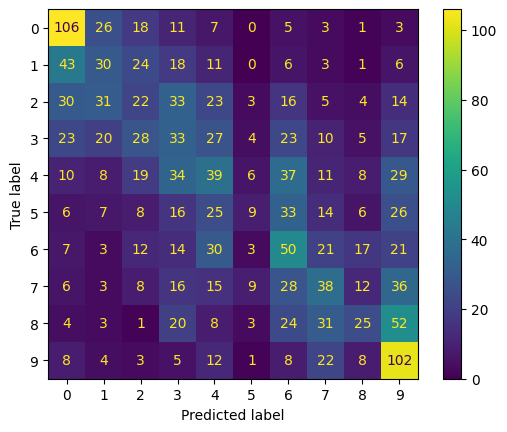

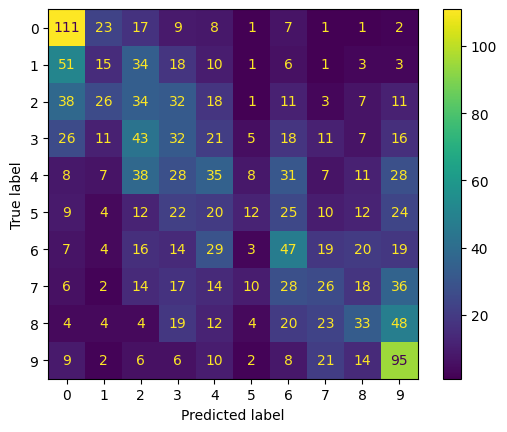

In [57]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay
# ensemble 
pred_ensemble= clf.predict(dev_embed)
print(precision_recall_fscore_support(dev_label, pred_ensemble, average='macro'))
print(accuracy_score(dev_label, pred_ensemble))
ConfusionMatrixDisplay.from_predictions(dev_label, pred_ensemble)

# self ensemble

self_trainning_model = SelfTrainingClassifier(clf, threshold=0.75)
self_trainning_model.fit(train_embed, semi_label)

pred_ensemble_self = self_trainning_model.predict(dev_embed)
print(precision_recall_fscore_support(dev_label, pred_ensemble_self, average='macro'))
print(accuracy_score(dev_label, pred_ensemble_self))
ConfusionMatrixDisplay.from_predictions(dev_label, pred_ensemble_self)

/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.1476285402391752, 0.16475408769186248, 0.14383030968996632, None)
0.16637881404720783
(0.1570624002301662, 0.16745998174060822, 0.14404240274275326, None)
0.16580310880829016


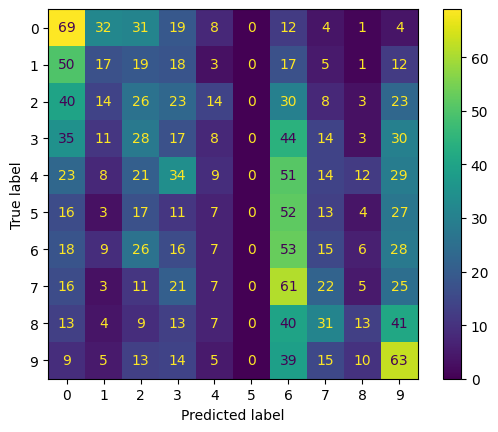

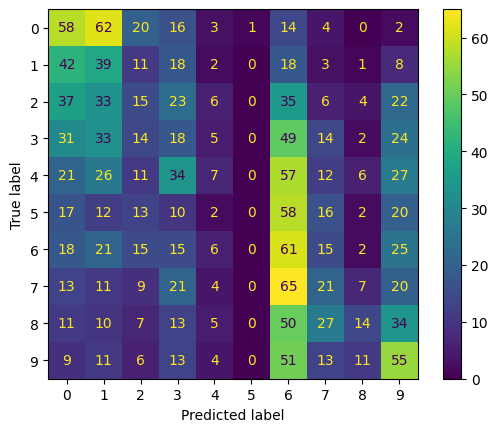

In [80]:
# dt
pred_dt= dt_model.predict(dev_embed)
print(precision_recall_fscore_support(dev_label, pred_dt, average='macro'))
print(accuracy_score(dev_label, pred_dt))
ConfusionMatrixDisplay.from_predictions(dev_label, pred_dt)

# dt self
self_trainning_model_dt= SelfTrainingClassifier(dt_model, threshold=0.75)
self_trainning_model_dt.fit(train_embed, semi_label)

pred_dt_self = self_trainning_model_dt.predict(dev_embed)
print(precision_recall_fscore_support(dev_label, pred_dt_self, average='macro'))
print(accuracy_score(dev_label, pred_dt_self))
ConfusionMatrixDisplay.from_predictions(dev_label, pred_dt_self)

(0.21792789301606122, 0.24004709078573505, 0.21940710558044035, None)
0.24237190558434082


/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

(0.21870463110566427, 0.24063188610737246, 0.2202845941071995, None)
0.2429476108232585


/Users/evansxu/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


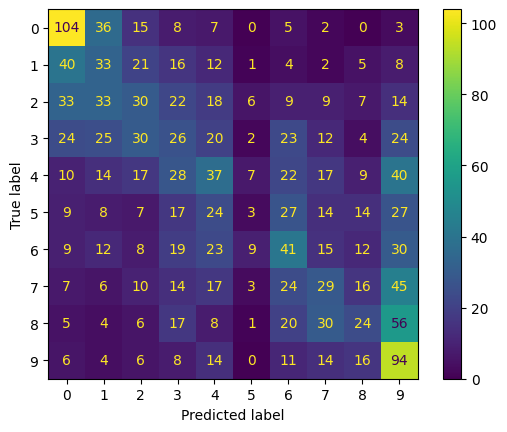

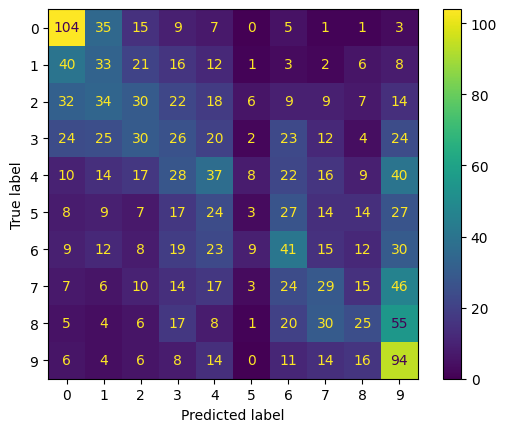

In [59]:
# lr
pred_lr= lr_model.predict(dev_embed)
print(precision_recall_fscore_support(dev_label, pred_lr, average='macro'))
print(accuracy_score(dev_label, pred_lr))
ConfusionMatrixDisplay.from_predictions(dev_label, pred_lr)

# lr self
self_trainning_model_lr= SelfTrainingClassifier(lr_model, threshold=0.75)
self_trainning_model_lr.fit(train_embed, semi_label)

pred_lr_self = self_trainning_model_lr.predict(dev_embed)
print(precision_recall_fscore_support(dev_label, pred_lr_self, average='macro'))
print(accuracy_score(dev_label, pred_lr_self))
ConfusionMatrixDisplay.from_predictions(dev_label, pred_lr_self)

In [39]:
final_prediction = clf_2.predict(test_embed)
kaggle = pd.DataFrame()
kaggle['job_id']=test_full.job_id
kaggle['salary_bin']=final_prediction
kaggle = kaggle.astype({'salary_bin':'int'})
kaggle.to_csv("submissionv5.csv",header=True,index=False)
kaggle  


,job_id,salary_bin
0,JOB-2019-0016087,0
1,JOB-2019-0008055,9
2,JOB-2019-0001658,4
3,JOB-2019-0016777,7
4,JOB-2019-0017600,8
...,...,...
1733,JOB-2019-0008938,6
1734,JOB-2019-0016714,0
1735,JOB-2019-0017903,7
1736,JOB-2019-0008671,6
